In [1]:
#Wczytanie danych
import librosa
import numpy as np

def file_txt_load(fname1, fname2):
    textfile1 = np.loadtxt(fname1 + '.txt', dtype='str', delimiter='\t')
    textfile2 = np.loadtxt(fname2 + '.txt', dtype='str', delimiter='\t')
    labels = [] #lista komend
    for i in range(len(textfile1)):
        word = textfile1[i][2]
        labels.append(word)
    return labels, textfile1, textfile2

fname1 = 'mk/258106_24_K_7_1'
fname2 = 'mk/258106_24_K_16_2'
labels, textfile1, textfile2 = file_txt_load(fname1, fname2)
print(labels)


['ZAPAL', 'SWIATLO', 'W', 'KUCHNI', 'OTWORZ', 'DRZWI', 'DO', 'GARAZU', 'WLACZ', 'ZMYWARKE', 'WYLACZ', 'TELEWIZOR', 'PODNIES', 'ROLETY', 'W', 'SYPIALNI', 'ZAMKNIJ', 'BRAME', 'ZWIEKSZ', 'OGRZEWANIE', 'O', 'JEDEN', 'STOPIEN', 'ZAKREC', 'WODE', 'W', 'LAZIENCE', 'USTAW', 'ALARM', 'PRZYCISZ', 'RADIO', 'ZMIEN', 'KANAL', 'PODLEJ', 'KWIATKI', 'ZAPARZ', 'KAWE', 'WYLACZ', 'ALARM', 'W', 'GARAZU', 'ZAGOTUJ', 'WODE']


In [164]:
#Wyznaczenie parametrów mel-cepstralnych (ang. MFCC – MelFrequency Cepstral Coefficients)
import librosa
import librosa.display

commands_no = 40
params1 = []
params2 = []

def mfcc_params(fname1, fname2, length) :
    for i in range(length) :
        y1, sr1 = librosa.load(fname1 + '.wav', 44100, True, float(textfile1[i][0]), float(textfile1[i][1]) - float(textfile1[i][0]))
        params1.append(librosa.feature.mfcc(y1, sr1))
        y2, sr2 = librosa.load(fname2 + '.wav', 44100, True, float(textfile2[i][0]), float(textfile2[i][1]) - float(textfile2[i][0]))
        params2.append(librosa.feature.mfcc(y2, sr2))
        
    return params1, params2

params1, params2 = mfcc_params(fname1, fname2, commands_no)

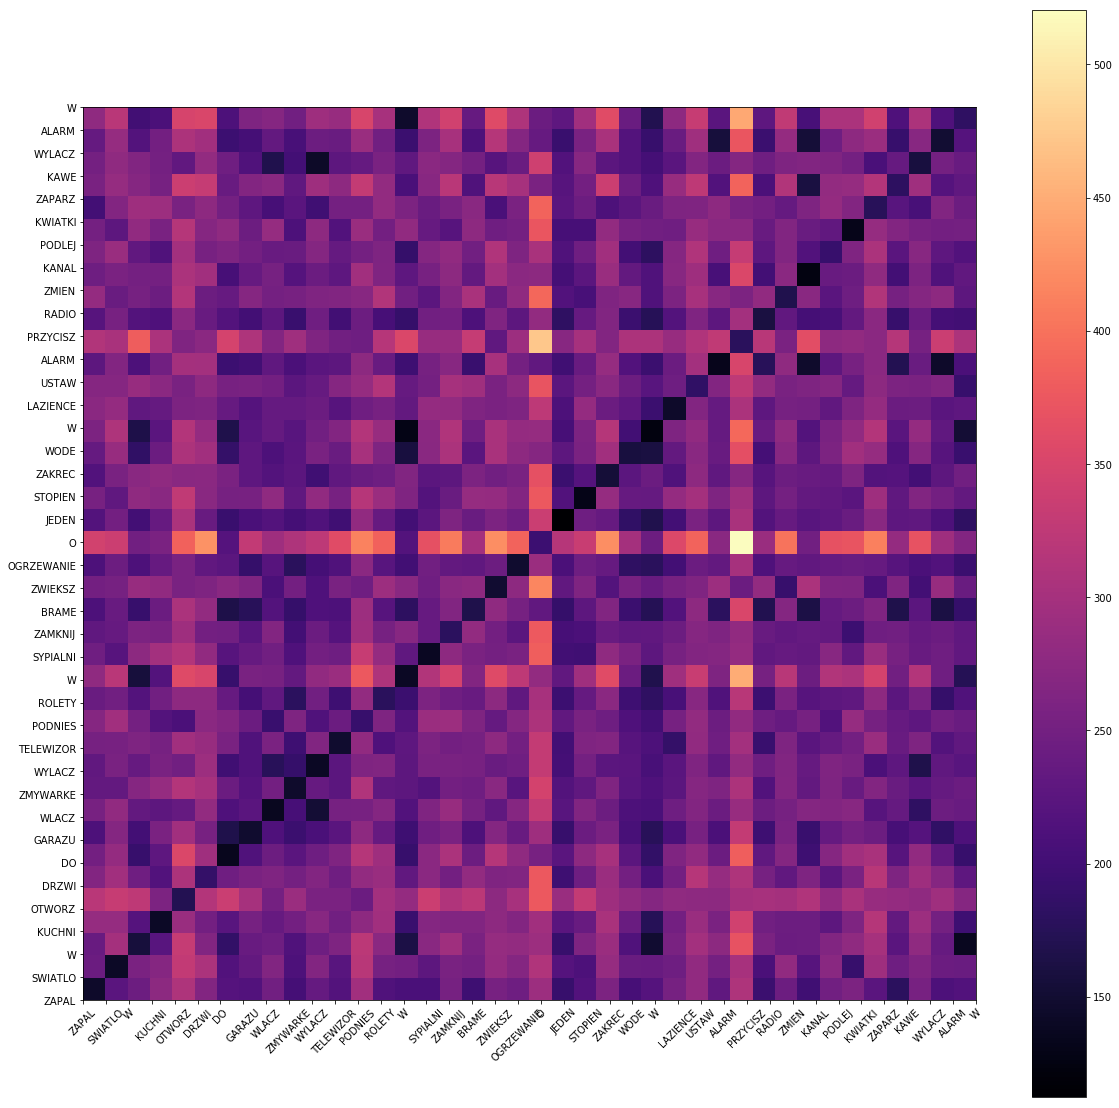

In [167]:
#Dynamic time warping - transformacja czasowa dla lepszego dopasowania dwóch sekwencji (dopasowania do wzorca)
from numpy.linalg import norm
from dtw import dtw
import numpy as np
import matplotlib.pyplot as plt

def conf_matrix(mfcc1, mfcc2, commands, labels, length) :
    distance = []
    for i in range(length) :
        vec = []
        for j in range(length) :
            dist, cost, acc_cost, path = dtw(mfcc1[i].T, mfcc2[j].T, dist=lambda x, y: norm(x - y, ord=1))
            vec.append(dist)
        distance.append(vec)
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    im = ax.imshow(distance, extent=[0,length-1,0,length-1], origin='lower', interpolation='nearest', cmap='magma')
    labels = []
    for i in range(length) :
        labels.append(commands[i][2])
    ax.set_xticklabels(labels, rotation=45)
    ax.set_yticklabels(labels)
    ax.set_xticks(np.arange(len(labels)))
    ax.set_yticks(np.arange(len(labels)))
    fig.set_size_inches(20, 20, forward=True)

    fig.colorbar(im)
    plt.show()
    
conf_matrix(params1, params2, textfile1, labels, commands_no)

In [168]:
#Obliczenie stopnia poprawnie rozpoznanych komend
def  match_ratio(mfcc1, mfcc2):

    match = 0
    for i in range(commands_no) :
        dist, cost, acc_cost, path = dtw(mfcc1[i].T, mfcc2[0].T, dist=lambda x, y: norm(x - y, ord=1))
        minimum = dist;
        min_idx = 0;
        for j in range(1, commands_no-1) :
            dist, cost, acc_cost, path = dtw(mfcc1[i].T, mfcc2[j].T, dist=lambda x, y: norm(x - y, ord=1))
            if minimum > dist :
                minimum = dist
                min_idx = j
        if(textfile1[i][2] == textfile1[min_idx][2]) :
            match = match + 1
            
    print("Match ratio: " + str((match/commands_no)*100) + "%")
    
match_ratio(mfccs1, mfccs2)

Match ratio: 47.5%


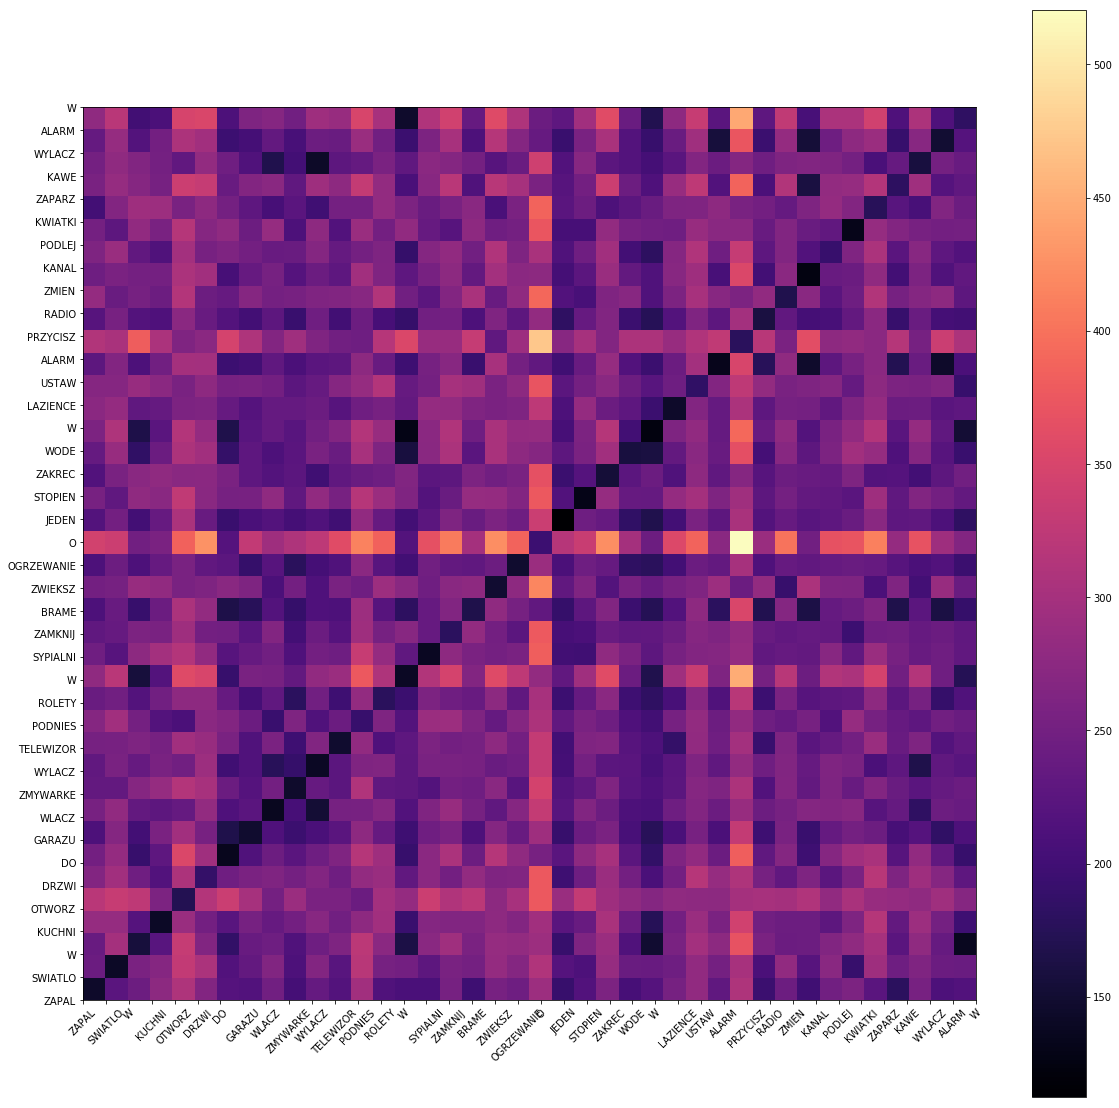

Match ratio: 92.5%


In [169]:
#Porównanie komend nagranych przez jedną osobę rano i wieczorem

fname1 = "mk/258106_24_K_7_1"
fname2 = "mk/258106_24_K_24_4"

labels, textfile1, textfile2 = file_txt_load(fname1, fname2)
mfccs1, mfccs2 = mfcc_params(fname1, fname2, commands_no)
conf_matrix(params1, params2, textfile1, labels, commands_no)
match_ratio(mfccs1, mfccs2)

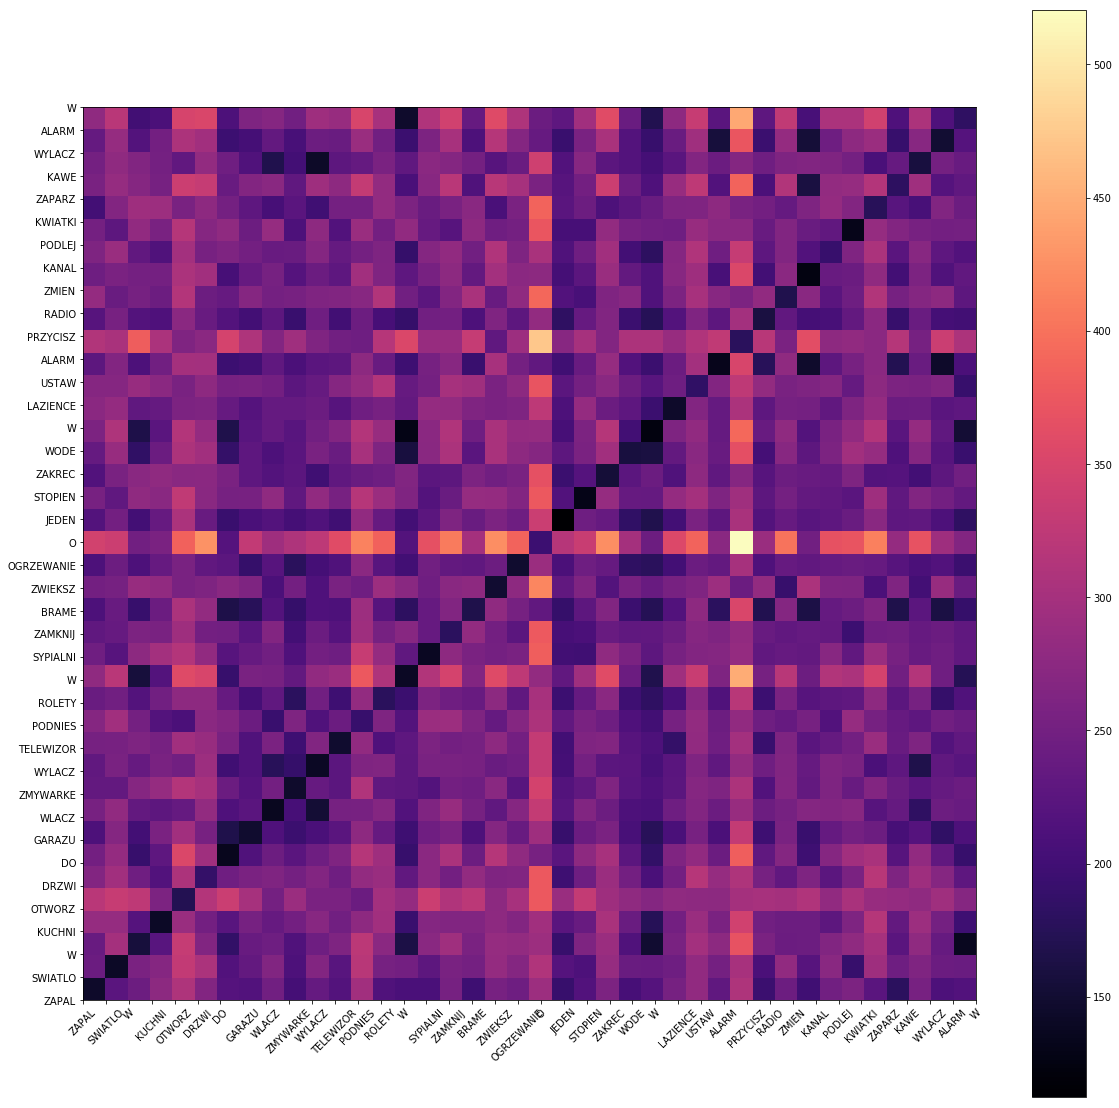

Match ratio: 92.5%


In [170]:
#Porównanie komend nagranych przez dwie różne osoby

fname1 = "mk/258106_24_K_7_1"
fname2 = "Lidia Wójtowicz/266762_24_K_1300"

labels, textfile1, textfile2 = file_txt_load(fname1, fname2)
mfccs1, mfccs2 = mfcc_params(fname1, fname2, commands_no)
conf_matrix(params1, params2, textfile1, labels, commands_no)
match_ratio(mfccs1, mfccs2)